<a href="https://colab.research.google.com/github/navy510616/DX-Motor/blob/main/DX_Motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#다운 받을 폴더 생성
import os.path

nowfolder = os.getcwd()                                         #현재 폴더 위치 확인
newfolder = 'DXmotor - OK'                                           #신규 폴더 생성
upfolder = os.path.abspath(os.path.join(nowfolder, os.pardir))  #현재 폴더에서 최상위 폴더로 이동
os.chdir(upfolder)                                              #최상위 폴더를 현재 위치로 변경

if not os.path.exists(newfolder):                               #현재 폴더에 신규 폴더 이름이 없는지 확인
    os.makedirs(newfolder)                                      #신규 폴더 생성
    
os.chdir('/'+ newfolder)                                        #신규 폴더로 현재 위치로 변경
folder = os.getcwd()                                            #신규 폴더를 변수 지정

In [3]:
#깃허브에서 파일 다운 받아 압축 풀기 
#from urllib.parse import urlparse
import urllib.request
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK1.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK1.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK2.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK2.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK3.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK3.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK4.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK4.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK5.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK5.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK6.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK6.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK7.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK7.zip')                                #down.zip이라는 이름으로 파일 다운

('OK7.zip', <http.client.HTTPMessage at 0x7f35fdaa0b90>)

In [4]:
#다운받은 파일 압축 풀기
!unzip OK1.zip                                                 #zip 파일 압축 풀기
!unzip OK2.zip
!unzip OK3.zip
!unzip OK4.zip
!unzip OK5.zip
!unzip OK6.zip
!unzip OK7.zip

Archive:  OK1.zip
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h43m01s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h43m29s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h43m45s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h44m02s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h44m17s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h44m32s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h44m48s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h45m03s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h45m19s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h45m33s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h45m49s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h46m04s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h46m20s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h46m35s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12020y09m24d_04h46m50s.tdms  
  inflating: barcode_W

In [5]:
pip install nptdms   # 한번만 설치 / colab 재접속시 설치 필요

     |████████████████████████████████| 174kB 3.9MB/s 
  Created wheel for nptdms: filename=npTDMS-1.3.0-py2.py3-none-any.whl size=99052 sha256=adb1da75cde379ba2e29ab7ad809b932d4219f16f9866f1d5f71416c9f2996fa
  Stored in directory: /root/.cache/pip/wheels/59/e7/00/43c6057d60167697a2c7d455f1d58f9f43972e6d1a298860c5
Successfully built nptdms


In [6]:
from nptdms import TdmsFile as td
from nptdms import tdms

folder_path = folder                                                     # 폴더 주소 받기
file_list = os.listdir(folder_path)                                      # 폴더 내에 파일 전체 리스트 받기
file_list_tdms = [file for file in file_list if file.endswith('.tdms')]  # 폴더 내에 Tdms 파일만 리스트 만들기
df = pd.DataFrame()                                                      # 빈 DataFrame 만들기 

for i in range(len(file_list_tdms)):                                     # 폴더 내에 파일 for 문
  file_path = folder_path + '/' + file_list_tdms[i]                      # 폴더 내 파일 주소 
  tdms_file = td.read(file_path)                                         # tdms 파일을 변환


  for group in tdms_file.groups():                                       # tdms 파일내에 data 값 가지고 오기
#    group_name = group.name                                             # (정보 가져오기)
    for channel in group.channels():
#        channel_name = channel.name                                     # (정보 가져오기)
#        properties = channel.properties                                 # (정보 가져오기)
        data = pd.DataFrame(channel[:6500])                              # 합/불 진동 데이터로 사용하는 주파수가 0 ~ 6500Hz임 (이후 데이터 삭제)
        data.columns = [ i+1 ]                                           # 컬럼명 변경
  
  df = pd.concat([df, data], axis=1)                                     # 각각의 데이터를 열 추가  
  i = i + 1

dfOK = df.copy()                                                           #사본 저장

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,0.013450,-0.000581,-0.016979,-0.026999,0.026601,0.044041,0.027601,0.009581,-0.089042,-0.047281,0.069122,-0.012836,0.041451,-0.000166,0.007705,-0.117549,-0.065111,0.058969,0.032545,0.007127,-0.100562,0.099580,0.036296,-0.123951,-0.004122,-0.010288,0.017990,-0.000738,-0.013594,-0.013510,-0.086513,0.048551,-0.011288,0.060805,0.029371,-0.093926,-0.040759,0.067797,0.012793,-0.052140,...,0.024319,-0.028414,0.064503,-0.000581,-0.091083,-0.055103,0.033222,-0.032828,0.061426,-0.117587,0.000485,-0.054669,0.012299,0.081171,-0.033736,0.004122,-0.027330,-0.023627,-0.028149,0.010258,-0.017033,0.003399,0.007681,-0.001858,-0.036953,0.030245,0.006403,-0.022970,0.063822,0.002165,0.026583,-0.032425,-0.141113,0.006675,-0.202680,0.057626,-0.034041,-0.055585,-0.033713,0.077197
1,0.014226,0.007241,-0.026602,-0.043541,0.052694,0.021874,0.029426,0.004877,-0.093799,-0.046263,0.071271,-0.013534,0.031082,0.004905,-0.001009,-0.104061,-0.050954,0.061751,0.060209,-0.003863,-0.080804,0.054729,0.026126,-0.138538,0.016135,0.001767,-0.005110,0.002671,-0.043192,-0.028077,-0.075499,0.037314,-0.032708,0.074481,0.028540,-0.075023,-0.037182,0.033858,0.006416,-0.035050,...,0.033569,-0.046980,0.069073,0.021880,-0.096118,-0.039735,0.013931,0.002839,0.039783,-0.096008,-0.018593,-0.034087,0.020351,0.070446,-0.055370,-0.002906,-0.047335,-0.026523,-0.046401,0.030509,-0.017641,0.018123,0.028336,0.002695,-0.039410,0.027372,0.006634,-0.025247,0.053724,0.004531,0.043185,-0.020917,-0.127325,-0.001382,-0.159178,0.048412,-0.015280,-0.046251,-0.040416,0.069886
2,0.021844,0.014570,-0.020255,-0.047798,0.059932,-0.000316,0.042150,0.029440,-0.098183,-0.032593,0.071831,-0.017015,0.029492,0.015118,-0.003309,-0.073042,-0.040952,0.058523,0.067983,-0.004471,-0.065840,0.008566,0.018701,-0.151710,0.047160,0.000990,-0.009457,0.014606,-0.057259,-0.029709,-0.065677,0.032792,-0.052748,0.091155,0.026806,-0.059427,-0.045805,-0.020652,0.002767,-0.025734,...,0.027029,-0.048359,0.058415,0.048364,-0.086555,-0.029727,0.002254,0.034851,0.012504,-0.086515,-0.033436,0.009686,0.033623,0.054597,-0.058890,-0.005784,-0.071464,-0.043300,-0.061119,0.036989,-0.007639,0.027185,0.033918,-0.007591,-0.045890,0.017442,-0.001150,-0.001569,0.045883,0.015027,0.070603,-0.029920,-0.116386,-0.008669,-0.128961,0.048316,-0.016018,-0.044294,-0.051008,0.051797
3,0.023205,0.016984,0.006850,-0.039488,0.085007,-0.019381,0.049707,0.039702,-0.088374,-0.023139,0.059884,-0.009969,0.038856,0.026854,-0.005591,-0.044517,-0.032389,0.038675,0.070434,-0.024783,-0.035538,-0.021302,0.010770,-0.160569,0.068056,0.001526,-0.000876,0.016834,-0.073951,-0.033906,-0.037501,0.035056,-0.068375,0.110648,0.003779,-0.037844,-0.053495,-0.046733,-0.007789,-0.018237,...,0.011992,-0.051863,0.040343,0.072933,-0.069116,-0.026939,-0.006757,0.031148,-0.035905,-0.084813,-0.044161,0.040698,0.041632,0.030654,-0.025499,-0.003261,-0.086742,-0.057879,-0.067388,0.021880,-0.016858,0.039711,0.029805,-0.015744,-0.051887,0.007651,-0.008081,0.005115,0.042451,0.036296,0.076203,-0.049575,-0.096588,-0.002514,-0.089156,0.046564,-0.016458,-0.034864,-0.071290,0.028239
4,0.018261,0.030672,0.025716,-0.018454,0.090318,-0.022706,0.057644,0.044357,-0.077847,-0.009602,0.056452,0.001448,0.061426,0.039060,-0.005230,-0.031618,-0.032852,0.019441,0.073210,-0.022916,-0.018641,-0.028300,0.014112,-0.136324,0.068182,-0.001491,0.016202,0.009824,-0.088061,-0.022459,0.006482,0.026734,-0.076595,0.141847,-0.014841,-0.005682,-0.062052,-0.060161,-0.024331,-0.007645,...,0.009355,-0.017563,0.011083,0.077793,-0.079768,-0.030678,0.011863,0.019074,-0.066767,-0.096728,-0.053224,0.040692,0.042776,0.005212,0.001406,0.012053,-0.100652,-0.057277,-0.092505,-0.004471,-0.032798,0.044733,0.014142,-0.032503,-0.048605,-0.008885,-0.008203,0.013

In [7]:
df1=dfOK.transpose() #행,열 변환
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6460,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499
1,0.013450,0.014226,0.021844,0.023205,0.018261,-0.008934,-0.026421,-0.042885,-0.041873,-0.033563,-0.026861,-0.014112,-0.013619,-0.001617,-0.000858,0.007910,0.016093,0.030582,0.027083,0.038163,0.031057,0.044456,0.049286,0.045149,0.029968,0.016719,-0.004634,-0.007518,-0.007970,-0.002538,0.017544,0.016322,0.021278,0.016039,0.014949,0.002532,0.001346,-0.006127,0.001888,-0.007801,...,-0.069050,-0.090945,-0.091499,-0.083333,-0.071061,-0.053519,-0.031238,-0.020068,-0.006838,0.018261,0.035785,0.050370,0.052622,0.064966,0.067773,0.075246,0.070609,0.062588,0.044498,0.023410,-0.002243,-0.010156,-0.005664,0.002508,0.001960,-0.011005,-0.030757,-0.047431,-0.047275,-0.038597,-0.011806,-0.000991,0.008969,0.002960,-0.002984,-0.008121,-0.002707,0.001725,0.014672,0.011143
2,-0.000581,0.007241,0.014570,0.016984,0.030672,0.039205,0.044649,0.041439,0.026595,0.004953,-0.019966,-0.036712,-0.050581,-0.058475,-0.064015,-0.070001,-0.062323,-0.053754,-0.042644,-0.025096,-0.009963,0.017219,0.039253,0.060715,0.079094,0.091143,0.097340,0.085140,0.065647,0.047118,0.023602,0.011095,-0.000124,-0.011770,-0.006447,-0.003622,-0.005676,-0.011631,-0.010282,-0.016340,...,0.011474,0.002562,-0.006844,-0.006892,-0.001466,-0.009144,-0.000431,-0.010288,-0.017623,-0.017274,-0.024337,-0.015028,-0.004815,0.000057,0.007368,0.007229,0.002887,0.017430,0.023307,0.032111,0.024777,0.005730,-0.006555,-0.010246,0.000304,-0.003297,-0.001605,-0.020273,-0.035309,-0.045570,-0.053158,-0.054856,-0.043920,-0.064286,-0.073686,-0.083496,-0.098490,-0.089921,-0.093071,-0.081635
3,-0.016979,-0.026602,-0.020255,0.006850,0.025716,0.036676,0.024807,0.008355,-0.004194,-0.001479,0.013793,0.024692,0.031467,0.022952,0.018478,0.027426,0.041837,0.060131,0.073632,0.065033,0.042252,0.015112,-0.007518,-0.020056,-0.029769,-0.045311,-0.073397,-0.089813,-0.110323,-0.097298,-0.066105,-0.029432,-0.000864,0.017448,0.019893,0.037748,0.068050,0.096792,0.124396,0.121554,...,0.114376,0.057788,0.009680,-0.020791,-0.029835,-0.040903,-0.061498,-0.094227,-0.122427,-0.133303,-0.108565,-0.071579,-0.026048,0.001707,0.027980,0.039536,0.073415,0.100441,0.128298,0.140342,0.128864,0.105668,0.092673,0.088175,0.090300,0.086573,0.049009,0.007018,-0.026529,-0.038067,-0.041265,-0.023386,-0.028631,-0.041716,-0.053748,-0.061221,-0.041861,-0.014913,0.022717,0.029817
4,-0.026999,-0.043541,-0.047798,-0.039488,-0.018454,-0.001063,0.006025,-0.000250,-0.002189,0.002677,0.028576,0.058264,0.077974,0.086729,0.085471,0.066514,0.054272,0.039452,0.047274,0.042457,0.029901,0.002532,-0.027499,-0.048846,-0.058216,-0.068748,-0.055597,-0.048678,-0.048955,-0.042313,-0.039976,-0.015148,0.015804,0.024921,0.034713,0.044456,0.043902,0.040855,0.033894,0.031732,...,-0.009313,-0.018508,-0.010282,-0.020658,-0.033774,-0.058541,-0.062209,-0.058800,-0.050858,-0.035189,-0.013986,-0.009602,-0.000449,-0.001081,0.007133,0.031846,0.026077,0.035797,0.034671,0.039542,0.048581,0.054741,0.052580,0.060155,0.056602,0.050604,0.048280,0.045432,0.036772,0.020965,0.009228,-0.012017,-0.012047,-0.028119,-0.041933,-0.040380,-0.033268,-0.031612,-0.023530,-0.026511
5,0.026601,0.052694,0.059932,0.085007,0.090318,0.096316,0.081352,0.073048,0.059131,0.065249,0.055223,0.044817,0.017888,-0.015594,-0.045245,-0.057951,-0.061299,-0.040578,-0.035791,-0.042319,-0.055223,-0.071097,-0.055254,-0.036718,-0.016425,-0.005465,-0.007163,-0.012107,-0.012221,0.012185,0.042716,0.064551,0.071892,0.049201,0.035706,0.039542,0.043438,0.055910,0.062672,0.042306,...,0.106005,0.088855,0.078750,0.063082,0.058680,0.044841,0.023952,-0.005748,-0.041963,-0.072127,-0.071687,-0.068941,-0.059487,-0.064858,-0.083924,-0.096696,-0.092137,-0.072729,-0.035201,0.003863,0.024433,0.032316,0.025849,0.025054,0.025337

In [8]:
df1['6500'] = 1
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499,6500
1,0.013450,0.014226,0.021844,0.023205,0.018261,-0.008934,-0.026421,-0.042885,-0.041873,-0.033563,-0.026861,-0.014112,-0.013619,-0.001617,-0.000858,0.007910,0.016093,0.030582,0.027083,0.038163,0.031057,0.044456,0.049286,0.045149,0.029968,0.016719,-0.004634,-0.007518,-0.007970,-0.002538,0.017544,0.016322,0.021278,0.016039,0.014949,0.002532,0.001346,-0.006127,0.001888,-0.007801,...,-0.090945,-0.091499,-0.083333,-0.071061,-0.053519,-0.031238,-0.020068,-0.006838,0.018261,0.035785,0.050370,0.052622,0.064966,0.067773,0.075246,0.070609,0.062588,0.044498,0.023410,-0.002243,-0.010156,-0.005664,0.002508,0.001960,-0.011005,-0.030757,-0.047431,-0.047275,-0.038597,-0.011806,-0.000991,0.008969,0.002960,-0.002984,-0.008121,-0.002707,0.001725,0.014672,0.011143,1
2,-0.000581,0.007241,0.014570,0.016984,0.030672,0.039205,0.044649,0.041439,0.026595,0.004953,-0.019966,-0.036712,-0.050581,-0.058475,-0.064015,-0.070001,-0.062323,-0.053754,-0.042644,-0.025096,-0.009963,0.017219,0.039253,0.060715,0.079094,0.091143,0.097340,0.085140,0.065647,0.047118,0.023602,0.011095,-0.000124,-0.011770,-0.006447,-0.003622,-0.005676,-0.011631,-0.010282,-0.016340,...,0.002562,-0.006844,-0.006892,-0.001466,-0.009144,-0.000431,-0.010288,-0.017623,-0.017274,-0.024337,-0.015028,-0.004815,0.000057,0.007368,0.007229,0.002887,0.017430,0.023307,0.032111,0.024777,0.005730,-0.006555,-0.010246,0.000304,-0.003297,-0.001605,-0.020273,-0.035309,-0.045570,-0.053158,-0.054856,-0.043920,-0.064286,-0.073686,-0.083496,-0.098490,-0.089921,-0.093071,-0.081635,1
3,-0.016979,-0.026602,-0.020255,0.006850,0.025716,0.036676,0.024807,0.008355,-0.004194,-0.001479,0.013793,0.024692,0.031467,0.022952,0.018478,0.027426,0.041837,0.060131,0.073632,0.065033,0.042252,0.015112,-0.007518,-0.020056,-0.029769,-0.045311,-0.073397,-0.089813,-0.110323,-0.097298,-0.066105,-0.029432,-0.000864,0.017448,0.019893,0.037748,0.068050,0.096792,0.124396,0.121554,...,0.057788,0.009680,-0.020791,-0.029835,-0.040903,-0.061498,-0.094227,-0.122427,-0.133303,-0.108565,-0.071579,-0.026048,0.001707,0.027980,0.039536,0.073415,0.100441,0.128298,0.140342,0.128864,0.105668,0.092673,0.088175,0.090300,0.086573,0.049009,0.007018,-0.026529,-0.038067,-0.041265,-0.023386,-0.028631,-0.041716,-0.053748,-0.061221,-0.041861,-0.014913,0.022717,0.029817,1
4,-0.026999,-0.043541,-0.047798,-0.039488,-0.018454,-0.001063,0.006025,-0.000250,-0.002189,0.002677,0.028576,0.058264,0.077974,0.086729,0.085471,0.066514,0.054272,0.039452,0.047274,0.042457,0.029901,0.002532,-0.027499,-0.048846,-0.058216,-0.068748,-0.055597,-0.048678,-0.048955,-0.042313,-0.039976,-0.015148,0.015804,0.024921,0.034713,0.044456,0.043902,0.040855,0.033894,0.031732,...,-0.018508,-0.010282,-0.020658,-0.033774,-0.058541,-0.062209,-0.058800,-0.050858,-0.035189,-0.013986,-0.009602,-0.000449,-0.001081,0.007133,0.031846,0.026077,0.035797,0.034671,0.039542,0.048581,0.054741,0.052580,0.060155,0.056602,0.050604,0.048280,0.045432,0.036772,0.020965,0.009228,-0.012017,-0.012047,-0.028119,-0.041933,-0.040380,-0.033268,-0.031612,-0.023530,-0.026511,1
5,0.026601,0.052694,0.059932,0.085007,0.090318,0.096316,0.081352,0.073048,0.059131,0.065249,0.055223,0.044817,0.017888,-0.015594,-0.045245,-0.057951,-0.061299,-0.040578,-0.035791,-0.042319,-0.055223,-0.071097,-0.055254,-0.036718,-0.016425,-0.005465,-0.007163,-0.012107,-0.012221,0.012185,0.042716,0.064551,0.071892,0.049201,0.035706,0.039542,0.043438,0.055910,0.062672,0.042306,...,0.088855,0.078750,0.063082,0.058680,0.044841,0.023952,-0.005748,-0.041963,-0.072127,-0.071687,-0.068941,-0.059487,-0.064858,-0.083924,-0.096696,-0.092137,-0.072729,-0.035201,0.003863,0.024433,0.032316,0.025849,0.025054,0.025337,0.049183,0.054163,0.059523,0.057174,0.

In [9]:
#다운 받을 폴더 생성
import os.path

nowfolder = os.getcwd()                                         #현재 폴더 위치 확인
newfolder = 'DXmotor - NG'                                           #신규 폴더 생성
upfolder = os.path.abspath(os.path.join(nowfolder, os.pardir))  #현재 폴더에서 최상위 폴더로 이동
os.chdir(upfolder)                                              #최상위 폴더를 현재 위치로 변경

if not os.path.exists(newfolder):                               #현재 폴더에 신규 폴더 이름이 없는지 확인
    os.makedirs(newfolder)                                      #신규 폴더 생성
    
os.chdir('/'+ newfolder)                                        #신규 폴더로 현재 위치로 변경
folder = os.getcwd()                                            #신규 폴더를 변수 지정

In [10]:
#깃허브에서 파일 다운 받아 압축 풀기 
#from urllib.parse import urlparse
import urllib.request
urls = 'https://github.com/navy510616/DX-Motor/raw/main/NG1.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'NG1.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/NG2.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'NG2.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/NG3.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'NG3.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/NG6.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'NG4.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/NG7.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'NG5.zip')                                #down.zip이라는 이름으로 파일 다운

('NG5.zip', <http.client.HTTPMessage at 0x7f35fcd41f90>)

In [11]:
#다운받은 파일 압축 풀기
!unzip NG1.zip                                                 #zip 파일 압축 풀기
!unzip NG2.zip
!unzip NG3.zip
!unzip NG4.zip
!unzip NG5.zip

Archive:  NG1.zip
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h54m19s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h54m34s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h54m49s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h55m04s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h55m19s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h55m35s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h55m50s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h56m05s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h56m20s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h56m40s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h56m55s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h57m10s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h57m25s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h57m40s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h57m55s.tdms  
  inflating: barcode_W

In [12]:
from nptdms import TdmsFile as td
from nptdms import tdms

folder_path = folder                                                     # 폴더 주소 받기
file_list = os.listdir(folder_path)                                      # 폴더 내에 파일 전체 리스트 받기
file_list_tdms = [file for file in file_list if file.endswith('.tdms')]  # 폴더 내에 Tdms 파일만 리스트 만들기
df = pd.DataFrame()                                                      # 빈 DataFrame 만들기 

for i in range(len(file_list_tdms)):                                     # 폴더 내에 파일 for 문
  file_path = folder_path + '/' + file_list_tdms[i]                      # 폴더 내 파일 주소 
  tdms_file = td.read(file_path)                                         # tdms 파일을 변환


  for group in tdms_file.groups():                                       # tdms 파일내에 data 값 가지고 오기
#    group_name = group.name                                             # (정보 가져오기)
    for channel in group.channels():
#        channel_name = channel.name                                     # (정보 가져오기)
#        properties = channel.properties                                 # (정보 가져오기)
        data = pd.DataFrame(channel[:6500])                              # 합/불 진동 데이터로 사용하는 주파수가 0 ~ 6500Hz임 (이후 데이터 삭제)
        data.columns = [ i+1 ]                                           # 컬럼명 변경
  
  df = pd.concat([df, data], axis=1)                                     # 각각의 데이터를 열 추가  
  i = i + 1

dfNG = df.copy()                                                           #사본 저장
dfNG

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450
0,-0.042527,0.058986,-0.496006,0.015781,-0.011967,-0.724506,-0.042901,-0.028956,0.027987,-0.012928,0.014161,-0.050009,-0.075127,0.018205,-0.586687,0.051098,-0.020857,0.028532,-0.035445,-0.013548,0.030203,-0.601096,-0.115454,-0.011348,0.012958,-0.992961,0.103345,0.056979,-0.043730,0.027203,-0.026202,-0.074476,-0.097262,0.010141,0.038272,0.026987,0.046638,0.069591,-0.000641,0.020754,...,-0.009259,-1.088020,-0.343683,0.051978,-0.788402,0.008865,0.087806,-0.037611,-0.011203,0.012920,0.030764,-0.066809,-0.126835,0.006471,-0.026712,0.013197,0.017098,-0.570389,-0.007300,0.007404,0.049253,-0.018587,-0.012405,-1.912231,0.011725,-0.051557,0.019243,0.124884,-1.501898,0.049731,-0.029065,0.009724,-0.038206,0.011058,-1.164771,-0.003569,0.007116,0.112483,0.092470,-0.004815
1,-0.063031,0.038120,-0.497416,0.027736,-0.012565,-0.706575,-0.049585,-0.016196,0.024182,0.006735,0.029510,-0.050544,-0.064768,0.038028,-0.579340,-0.019032,0.002267,0.009557,-0.037973,-0.014597,0.032290,-0.601919,-0.113256,-0.010331,0.001101,-0.989703,0.124438,0.058820,-0.034346,0.037844,-0.015990,-0.072727,-0.110100,0.015241,0.040253,-0.015915,0.064117,0.078606,0.002083,-0.018057,...,-0.005068,-1.087636,-0.345482,0.068229,-0.780196,0.003955,0.071518,-0.048824,-0.001028,0.017015,0.033253,-0.064292,-0.137692,0.009706,-0.016757,0.009108,0.019544,-0.568144,-0.006891,0.008801,0.036169,-0.021796,-0.006292,-1.909541,-0.004802,-0.025670,0.027196,0.132772,-1.525265,0.045086,-0.049671,-0.004845,-0.064964,0.009063,-1.162296,0.015174,0.002317,0.062079,0.106585,0.010037
2,-0.046166,0.018647,-0.505664,0.032879,-0.012041,-0.698912,-0.044908,-0.013613,0.013253,0.013848,0.064147,-0.049171,-0.057587,0.029295,-0.567977,-0.089331,0.005226,-0.002724,-0.031014,-0.008172,0.016278,-0.599046,-0.114551,-0.008518,-0.008098,-0.977318,0.114588,0.056955,-0.026331,0.047395,0.009564,-0.059398,-0.117929,0.006011,0.035730,-0.051014,0.078858,0.079153,0.003102,-0.026192,...,-0.013113,-1.092578,-0.345512,0.089665,-0.781501,-0.005754,0.046344,-0.057231,-0.006625,0.022290,0.033930,-0.054085,-0.142528,0.004992,-0.010534,0.002147,0.010887,-0.565930,-0.004164,0.009301,0.029406,-0.022650,-0.009794,-1.906252,-0.031609,0.024620,0.024563,0.132086,-1.542433,0.055138,-0.066057,-0.011940,-0.082228,-0.004475,-1.160526,0.008975,0.020642,0.015867,0.096085,0.037071
3,-0.011952,-0.006907,-0.516274,0.037838,-0.013334,-0.702195,-0.034886,-0.011589,-0.001536,0.008098,0.100497,-0.047564,-0.044927,0.011166,-0.560877,-0.154692,0.003299,-0.008649,-0.042349,0.005704,-0.000310,-0.597435,-0.114268,-0.010993,-0.017488,-0.966074,0.087800,0.064405,-0.001175,0.050195,0.032830,-0.043447,-0.122909,-0.001010,0.024132,-0.081037,0.072948,0.070904,0.021888,-0.067827,...,-0.012854,-1.102101,-0.342132,0.077821,-0.782496,-0.003299,0.020900,-0.074102,-0.017506,0.027890,0.037884,-0.009518,-0.142347,0.004925,-0.025540,-0.013691,0.008160,-0.564343,-0.003048,0.009168,0.041950,-0.023919,-0.010448,-1.906026,-0.041803,0.061299,0.006318,0.117338,-1.559638,0.064786,-0.080377,-0.029553,-0.094397,-0.024816,-1.159099,-0.013179,0.036463,-0.003563,0.092691,0.053297
4,0.028921,-0.018255,-0.524980,0.018660,-0.012401,-0.710333,-0.005613,-0.003219,-0.012884,-0.005109,0.099810,-0.050665,-0.039360,-0.004146,-0.554476,-0.214272,0.012547,0.001893,-0.047707,0.011762,-0.019071,-0.595525,-0.116664,-0.014335,-0.020176,-0.951999,0.049222,0.061306,0.025551,0.048449,0.052800,-0.028197,-0.129714,-0.006551,0.006802,-0.102280,0.067916,0.045742,0.036629,-0.135434,...,0.006055,-1.108233,-0.339793,0.069732,-0.787163,0.004096,0.000107,-0.096686,-0.028663,0.024488,0.031051,0.013763,-0.136277,0.006220,-0.041809,-0.025560,0.010838,-0.563373,-0.002493,0.007343,0.033806,-0.023260,-0.013908,-1.901585,-0.047621,0.088253

In [13]:
df2=dfNG.transpose() #행,열 변환
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6460,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499
1,-0.042527,-0.063031,-0.046166,-0.011952,0.028921,0.039722,0.014407,-0.019777,-0.042521,-0.038035,-0.012670,0.005127,0.000660,-0.025147,-0.051088,-0.049032,-0.013075,0.032732,0.066124,0.063595,0.023631,-0.011621,-0.033524,-0.013057,0.006085,0.026853,0.021096,0.011099,-0.001501,0.023913,0.055954,0.091727,0.083547,0.055580,-0.001893,-0.027479,-0.038955,-0.019715,-0.003685,-0.001458,...,0.046006,0.049130,0.034254,0.013486,-0.010001,-0.016561,-0.015855,-0.010620,-0.016555,-0.037071,-0.030725,-0.019893,0.007496,0.048173,0.066934,0.068670,0.045884,0.025668,0.011841,0.010068,0.022827,0.018868,-0.005085,-0.052119,-0.079061,-0.066701,-0.034205,0.002304,0.009221,-0.005889,-0.020967,-0.038759,-0.025865,0.000752,0.030056,0.060183,0.057863,0.046147,0.040403,0.040974
2,0.058986,0.038120,0.018647,-0.006907,-0.018255,-0.029424,-0.037501,-0.040293,-0.047209,-0.056734,-0.064872,-0.062994,-0.051186,-0.040778,-0.022477,-0.013775,0.001114,0.018328,0.034690,0.049873,0.055052,0.075796,0.092740,0.108758,0.108267,0.096054,0.086032,0.069708,0.062564,0.055543,0.042447,0.037009,0.031928,0.025011,0.007165,-0.020108,-0.039072,-0.046737,-0.040072,-0.038556,...,0.017598,0.026662,0.034125,0.031774,0.017205,0.007466,0.003734,0.022127,0.032965,0.028270,0.015247,-0.015174,-0.046620,-0.061693,-0.068738,-0.064399,-0.074403,-0.082774,-0.090789,-0.093955,-0.076729,-0.043871,-0.012621,0.019267,0.029369,0.048437,0.059790,0.081620,0.104713,0.124818,0.123849,0.109807,0.080638,0.056986,0.036156,0.013013,-0.002820,-0.018629,-0.031658,-0.047541
3,-0.496006,-0.497416,-0.505664,-0.516274,-0.524980,-0.531398,-0.537017,-0.541648,-0.546108,-0.551092,-0.557108,-0.563752,-0.571213,-0.581652,-0.592170,-0.605141,-0.617025,-0.633846,-0.650544,-0.669402,-0.681055,-0.687290,-0.685307,-0.679658,-0.668517,-0.654827,-0.638867,-0.620118,-0.603139,-0.586569,-0.570078,-0.549262,-0.526938,-0.505713,-0.487544,-0.476007,-0.469925,-0.469772,-0.478088,-0.484067,...,-0.293485,-0.421666,-0.554002,-0.644394,-0.679517,-0.648305,-0.589089,-0.538353,-0.518458,-0.531258,-0.578125,-0.641563,-0.699224,-0.725110,-0.710968,-0.653149,-0.591340,-0.539702,-0.520630,-0.510148,-0.507159,-0.489314,-0.470144,-0.437431,-0.408909,-0.405749,-0.442641,-0.500771,-0.543783,-0.540787,-0.478173,-0.387196,-0.297731,-0.245208,-0.245995,-0.294119,-0.378398,-0.470498,-0.544222,-0.580157
4,0.015781,0.027736,0.032879,0.037838,0.018660,-0.001077,-0.025951,-0.043711,-0.046982,-0.053518,-0.054108,-0.061147,-0.069923,-0.063534,-0.047062,-0.017377,0.015217,0.033284,0.045810,0.051045,0.052039,0.044417,0.037881,0.024600,0.021851,0.006441,-0.000813,-0.007239,0.006072,0.023956,0.027914,0.026816,0.024570,0.019813,0.016953,-0.005097,-0.012241,-0.032579,-0.037900,-0.037544,...,-0.011345,-0.006024,-0.004127,0.000592,0.011258,0.027215,0.038182,0.031609,0.018027,0.017500,0.018457,0.033603,0.035635,0.034346,0.018267,-0.015843,-0.042466,-0.060054,-0.051966,-0.033242,-0.013670,0.000304,-0.001194,0.007091,0.001163,0.010884,0.007472,0.007932,-0.003188,-0.023103,-0.038900,-0.041079,-0.032744,-0.016377,-0.008558,0.003845,0.003943,0.017874,0.020458,0.037279
5,-0.011967,-0.012565,-0.012041,-0.013334,-0.012401,-0.011418,-0.008587,-0.005854,-0.003804,-0.000010,0.003139,0.009288,0.012601,0.017451,0.019983,0.025377,0.027658,0.033326,0.033570,0.033814,0.031453,0.028836,0.026456,0.024352,0.020423,0.015639,0.010655,0.004389,-0.002090,-0.006916,-0.013584,-0.017501,-0.020545,-0.022168,-0.019923,-0.017416,-0.014499,-0.012193,-0.010369,-0.009551,...,0.023003,0.023754,0.022930,0.026023,0.026682,0.028256,0.024809,0.024382,0.022186,0.017641,0.013150,0.009008,0.006104,0.003852,0.001485,-0.000559,-0.002218,-0.004591,-0.007959,-0.006062,-0.010345,-0.011150,

In [14]:
df2['6500'] = 2
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499,6500
1,-0.042527,-0.063031,-0.046166,-0.011952,0.028921,0.039722,0.014407,-0.019777,-0.042521,-0.038035,-0.012670,0.005127,0.000660,-0.025147,-0.051088,-0.049032,-0.013075,0.032732,0.066124,0.063595,0.023631,-0.011621,-0.033524,-0.013057,0.006085,0.026853,0.021096,0.011099,-0.001501,0.023913,0.055954,0.091727,0.083547,0.055580,-0.001893,-0.027479,-0.038955,-0.019715,-0.003685,-0.001458,...,0.049130,0.034254,0.013486,-0.010001,-0.016561,-0.015855,-0.010620,-0.016555,-0.037071,-0.030725,-0.019893,0.007496,0.048173,0.066934,0.068670,0.045884,0.025668,0.011841,0.010068,0.022827,0.018868,-0.005085,-0.052119,-0.079061,-0.066701,-0.034205,0.002304,0.009221,-0.005889,-0.020967,-0.038759,-0.025865,0.000752,0.030056,0.060183,0.057863,0.046147,0.040403,0.040974,2
2,0.058986,0.038120,0.018647,-0.006907,-0.018255,-0.029424,-0.037501,-0.040293,-0.047209,-0.056734,-0.064872,-0.062994,-0.051186,-0.040778,-0.022477,-0.013775,0.001114,0.018328,0.034690,0.049873,0.055052,0.075796,0.092740,0.108758,0.108267,0.096054,0.086032,0.069708,0.062564,0.055543,0.042447,0.037009,0.031928,0.025011,0.007165,-0.020108,-0.039072,-0.046737,-0.040072,-0.038556,...,0.026662,0.034125,0.031774,0.017205,0.007466,0.003734,0.022127,0.032965,0.028270,0.015247,-0.015174,-0.046620,-0.061693,-0.068738,-0.064399,-0.074403,-0.082774,-0.090789,-0.093955,-0.076729,-0.043871,-0.012621,0.019267,0.029369,0.048437,0.059790,0.081620,0.104713,0.124818,0.123849,0.109807,0.080638,0.056986,0.036156,0.013013,-0.002820,-0.018629,-0.031658,-0.047541,2
3,-0.496006,-0.497416,-0.505664,-0.516274,-0.524980,-0.531398,-0.537017,-0.541648,-0.546108,-0.551092,-0.557108,-0.563752,-0.571213,-0.581652,-0.592170,-0.605141,-0.617025,-0.633846,-0.650544,-0.669402,-0.681055,-0.687290,-0.685307,-0.679658,-0.668517,-0.654827,-0.638867,-0.620118,-0.603139,-0.586569,-0.570078,-0.549262,-0.526938,-0.505713,-0.487544,-0.476007,-0.469925,-0.469772,-0.478088,-0.484067,...,-0.421666,-0.554002,-0.644394,-0.679517,-0.648305,-0.589089,-0.538353,-0.518458,-0.531258,-0.578125,-0.641563,-0.699224,-0.725110,-0.710968,-0.653149,-0.591340,-0.539702,-0.520630,-0.510148,-0.507159,-0.489314,-0.470144,-0.437431,-0.408909,-0.405749,-0.442641,-0.500771,-0.543783,-0.540787,-0.478173,-0.387196,-0.297731,-0.245208,-0.245995,-0.294119,-0.378398,-0.470498,-0.544222,-0.580157,2
4,0.015781,0.027736,0.032879,0.037838,0.018660,-0.001077,-0.025951,-0.043711,-0.046982,-0.053518,-0.054108,-0.061147,-0.069923,-0.063534,-0.047062,-0.017377,0.015217,0.033284,0.045810,0.051045,0.052039,0.044417,0.037881,0.024600,0.021851,0.006441,-0.000813,-0.007239,0.006072,0.023956,0.027914,0.026816,0.024570,0.019813,0.016953,-0.005097,-0.012241,-0.032579,-0.037900,-0.037544,...,-0.006024,-0.004127,0.000592,0.011258,0.027215,0.038182,0.031609,0.018027,0.017500,0.018457,0.033603,0.035635,0.034346,0.018267,-0.015843,-0.042466,-0.060054,-0.051966,-0.033242,-0.013670,0.000304,-0.001194,0.007091,0.001163,0.010884,0.007472,0.007932,-0.003188,-0.023103,-0.038900,-0.041079,-0.032744,-0.016377,-0.008558,0.003845,0.003943,0.017874,0.020458,0.037279,2
5,-0.011967,-0.012565,-0.012041,-0.013334,-0.012401,-0.011418,-0.008587,-0.005854,-0.003804,-0.000010,0.003139,0.009288,0.012601,0.017451,0.019983,0.025377,0.027658,0.033326,0.033570,0.033814,0.031453,0.028836,0.026456,0.024352,0.020423,0.015639,0.010655,0.004389,-0.002090,-0.006916,-0.013584,-0.017501,-0.020545,-0.022168,-0.019923,-0.017416,-0.014499,-0.012193,-0.010369,-0.009551,...,0.023754,0.022930,0.026023,0.026682,0.028256,0.024809,0.024382,0.022186,0.017641,0.013150,0.009008,0.006104,0.003852,0.001485,-0.000559,-0.002218,-0.004591,-0.007959,-0.006062,-0.010345,-0.011150,-0.015848,-0.018172,-0.018569,-0.014737

In [16]:
df = df1.append(df2)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499,6500
1,0.013450,0.014226,0.021844,0.023205,0.018261,-0.008934,-0.026421,-0.042885,-0.041873,-0.033563,-0.026861,-0.014112,-0.013619,-0.001617,-0.000858,0.007910,0.016093,0.030582,0.027083,0.038163,0.031057,0.044456,0.049286,0.045149,0.029968,0.016719,-0.004634,-0.007518,-0.007970,-0.002538,0.017544,0.016322,0.021278,0.016039,0.014949,0.002532,0.001346,-0.006127,0.001888,-0.007801,...,-0.090945,-0.091499,-0.083333,-0.071061,-0.053519,-0.031238,-0.020068,-0.006838,0.018261,0.035785,0.050370,0.052622,0.064966,0.067773,0.075246,0.070609,0.062588,0.044498,0.023410,-0.002243,-0.010156,-0.005664,0.002508,0.001960,-0.011005,-0.030757,-0.047431,-0.047275,-0.038597,-0.011806,-0.000991,0.008969,0.002960,-0.002984,-0.008121,-0.002707,0.001725,0.014672,0.011143,1
2,-0.000581,0.007241,0.014570,0.016984,0.030672,0.039205,0.044649,0.041439,0.026595,0.004953,-0.019966,-0.036712,-0.050581,-0.058475,-0.064015,-0.070001,-0.062323,-0.053754,-0.042644,-0.025096,-0.009963,0.017219,0.039253,0.060715,0.079094,0.091143,0.097340,0.085140,0.065647,0.047118,0.023602,0.011095,-0.000124,-0.011770,-0.006447,-0.003622,-0.005676,-0.011631,-0.010282,-0.016340,...,0.002562,-0.006844,-0.006892,-0.001466,-0.009144,-0.000431,-0.010288,-0.017623,-0.017274,-0.024337,-0.015028,-0.004815,0.000057,0.007368,0.007229,0.002887,0.017430,0.023307,0.032111,0.024777,0.005730,-0.006555,-0.010246,0.000304,-0.003297,-0.001605,-0.020273,-0.035309,-0.045570,-0.053158,-0.054856,-0.043920,-0.064286,-0.073686,-0.083496,-0.098490,-0.089921,-0.093071,-0.081635,1
3,-0.016979,-0.026602,-0.020255,0.006850,0.025716,0.036676,0.024807,0.008355,-0.004194,-0.001479,0.013793,0.024692,0.031467,0.022952,0.018478,0.027426,0.041837,0.060131,0.073632,0.065033,0.042252,0.015112,-0.007518,-0.020056,-0.029769,-0.045311,-0.073397,-0.089813,-0.110323,-0.097298,-0.066105,-0.029432,-0.000864,0.017448,0.019893,0.037748,0.068050,0.096792,0.124396,0.121554,...,0.057788,0.009680,-0.020791,-0.029835,-0.040903,-0.061498,-0.094227,-0.122427,-0.133303,-0.108565,-0.071579,-0.026048,0.001707,0.027980,0.039536,0.073415,0.100441,0.128298,0.140342,0.128864,0.105668,0.092673,0.088175,0.090300,0.086573,0.049009,0.007018,-0.026529,-0.038067,-0.041265,-0.023386,-0.028631,-0.041716,-0.053748,-0.061221,-0.041861,-0.014913,0.022717,0.029817,1
4,-0.026999,-0.043541,-0.047798,-0.039488,-0.018454,-0.001063,0.006025,-0.000250,-0.002189,0.002677,0.028576,0.058264,0.077974,0.086729,0.085471,0.066514,0.054272,0.039452,0.047274,0.042457,0.029901,0.002532,-0.027499,-0.048846,-0.058216,-0.068748,-0.055597,-0.048678,-0.048955,-0.042313,-0.039976,-0.015148,0.015804,0.024921,0.034713,0.044456,0.043902,0.040855,0.033894,0.031732,...,-0.018508,-0.010282,-0.020658,-0.033774,-0.058541,-0.062209,-0.058800,-0.050858,-0.035189,-0.013986,-0.009602,-0.000449,-0.001081,0.007133,0.031846,0.026077,0.035797,0.034671,0.039542,0.048581,0.054741,0.052580,0.060155,0.056602,0.050604,0.048280,0.045432,0.036772,0.020965,0.009228,-0.012017,-0.012047,-0.028119,-0.041933,-0.040380,-0.033268,-0.031612,-0.023530,-0.026511,1
5,0.026601,0.052694,0.059932,0.085007,0.090318,0.096316,0.081352,0.073048,0.059131,0.065249,0.055223,0.044817,0.017888,-0.015594,-0.045245,-0.057951,-0.061299,-0.040578,-0.035791,-0.042319,-0.055223,-0.071097,-0.055254,-0.036718,-0.016425,-0.005465,-0.007163,-0.012107,-0.012221,0.012185,0.042716,0.064551,0.071892,0.049201,0.035706,0.039542,0.043438,0.055910,0.062672,0.042306,...,0.088855,0.078750,0.063082,0.058680,0.044841,0.023952,-0.005748,-0.041963,-0.072127,-0.071687,-0.068941,-0.059487,-0.064858,-0.083924,-0.096696,-0.092137,-0.072729,-0.035201,0.003863,0.024433,0.032316,0.025849,0.025054,0.025337,0.049183,0.054163,0.059523,0.057174,0.

In [42]:
X = df
y = df['6500']
print(X)

            0         1         2         3  ...      6497      6498      6499  6500
1    0.013450  0.014226  0.021844  0.023205  ...  0.001725  0.014672  0.011143     1
2   -0.000581  0.007241  0.014570  0.016984  ... -0.089921 -0.093071 -0.081635     1
3   -0.016979 -0.026602 -0.020255  0.006850  ... -0.014913  0.022717  0.029817     1
4   -0.026999 -0.043541 -0.047798 -0.039488  ... -0.031612 -0.023530 -0.026511     1
5    0.026601  0.052694  0.059932  0.085007  ... -0.025174 -0.036556 -0.035996     1
..        ...       ...       ...       ...  ...       ...       ...       ...   ...
446 -0.003569  0.015174  0.008975 -0.013179  ...  0.091746  0.088223  0.067590     2
447  0.007116  0.002317  0.020642  0.036463  ... -0.022183 -0.038857 -0.048320     2
448  0.112483  0.062079  0.015867 -0.003563  ...  0.095772  0.058943  0.022692     2
449  0.092470  0.106585  0.096085  0.092691  ...  0.062889  0.055635  0.039090     2
450 -0.004815  0.010037  0.037071  0.053297  ...  0.024502  0.037

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
# 선형 분류 모델 생성, 학습 및 평가
# 분류 모델에서 score함수는 정확도(accuracy)를 알려준다
# 선형 분류 모델로 SGDClassifier 사용
from sklearn.linear_model import SGDClassifier
model = SGDClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 평가 (정확도)

0.9802371541501976

In [35]:
model.coef_, model.intercept_

(array([[  2.17149727,   1.84408597,   1.15519984, ...,   0.37289395,
           0.61322766, 151.36797798]]), array([-286.92882995]))

In [36]:
a1, a2 = model.coef_[0][0], model.coef_[0][1]
b = model.intercept_

TypeError: ignored

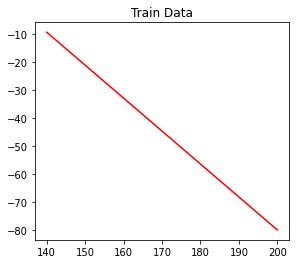

In [37]:
# 성별 예측 결정 경계 그리기
plt.figure(figsize=(10,4))

xs = np.linspace(140,200,2)
ys = -(a1/a2)*xs - b/a2

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_train, c=y_train, s=0.05)
plt.ylim([30,130])
plt.xlim([130,210])

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_test, c=y_test, s=0.05)
plt.ylim([30,130])
plt.xlim([130,210])

**로지스틱 회귀**

In [158]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [160]:
model.predict([[1.2],[8.8],[7.5]]) # (3) 모델 사용

[[-0.06438203 -0.05385847 -0.04328973 ...  0.01919479  0.01909451
  -0.01178355]]
[0.24632051]


In [173]:
model.predict([[1.2],[8.8],[7.5]]) # (3) 모델 사용

ValueError: ignored

In [ ]:
features = ["mean radius"]
X = df[features]
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression() # (1) 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 이진분류 성능, accuracy

**PCA**

In [22]:
# import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold

In [23]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X)
X_pca2[:3]

array([[-3.3396633 , -0.05442533],
       [-3.35618303, -0.16777228],
       [-3.36025908, -0.12575098]])

In [28]:
rfc = RandomForestClassifier(n_estimators=1000)
cv = KFold(5)
cross_val_score(rfc, X_pca2, y, cv=cv).mean().round(4)

0.5178

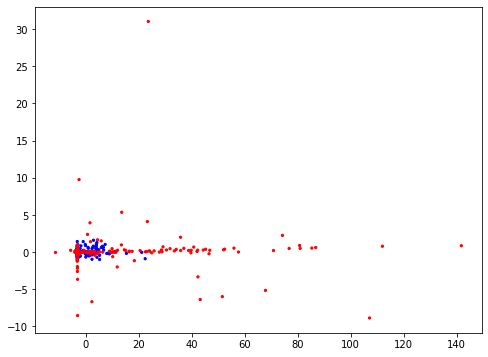

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0],X_pca2[:,1], c=y, s=5, cmap='bwr')